In [180]:
# Loading libraries

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer




In [181]:
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        display(df)

In [182]:
# read the stock data
data = pd.read_csv("stock_data_2017-01-01_to_2020-12-31.csv", delimiter=";", skiprows = 1) # FOR JUPITER
#app_train = data.copy()

In [183]:
data.head()


,Attributes,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Adj Close.6,Adj Close.7,Adj Close.8,...,Open.8,Volume,Volume.1,Volume.2,Volume.3,Volume.4,Volume.5,Volume.6,Volume.7,Volume.8
0,Symbols,msft,aapl,twtr,intc,tsm,goog,amzn,fb,nvda,...,nvda,msft,aapl,twtr,intc,tsm,goog,amzn,fb,nvda
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,58.403568267822266,27.413372039794922,16.440000534057617,32.65140151977539,25.37588882446289,786.1400146484375,753.6699829101562,116.86000061035156,100.71302795410156,...,104.4000015258789,20694100.0,115127600.0,11147900.0,20196500.0,6280300.0,1657300.0,3521100.0,20663900.0,37549900.0
3,2017-01-04,58.142242431640625,27.3826904296875,16.860000610351562,32.481903076171875,25.367229461669922,786.9000244140625,757.1799926757812,118.69000244140625,103.0627670288086,...,103.4000015258789,21340000.0,84472400.0,15861300.0,15915700.0,4391800.0,1073000.0,2510500.0,19630900.0,29980500.0
4,2017-01-05,58.142242431640625,27.521944046020508,17.09000015258789,32.428375244140625,25.800119400024414,794.02001953125,780.4500122070312,120.66999816894531,100.44644165039062,...,104.52999877929688,24876000.0,88774400.0,17074400.0,13986000.0,4775700.0,1335200.0,5830100.0,19492200.0,24607400.0


In [184]:
# organising the columns
df = data.copy()
for col in df.columns:
    if col[-1] == "1":
        temp1 = col
        new_temp1 = temp1.replace("1", "aapl", 1)
        df = df.rename(columns = {temp1:new_temp1})
     
    elif col[-1] == "2":
        temp2 = col
        new_temp2 = temp2.replace("2", "twtr", 1)
        df = df.rename(columns = {temp2:new_temp2})
      
    elif col[-1] == "3":
        temp3 = col
        new_temp3 = temp3.replace("3", "intc", 1)
        df = df.rename(columns = {temp3:new_temp3})
     
    elif col[-1] == "4":
        temp4 = col
        new_temp4 = temp4.replace("4", "tsm", 1)
        df = df.rename(columns = {temp4:new_temp4})

    elif col[-1] == "5":
        temp5 = col
        new_temp5 = temp5.replace("5", "goog", 1)
        df = df.rename(columns = {temp5:new_temp5})

    elif col[-1] == "6":
        temp6 = col
        new_temp6 = temp6.replace("6", "amzn", 1)
        df = df.rename(columns = {temp6:new_temp6})

    elif col[-1] == "7":
        temp7 = col
        new_temp7 = temp7.replace("7", "fb", 1)
        df = df.rename(columns = {temp7:new_temp7})

    elif col[-1] == "8":
        temp8 = col
        new_temp8 = temp8.replace("8", "nvda", 1)
        df = df.rename(columns = {temp8:new_temp8})
        
    elif col == "Attributes":
        temp9 = col
        new_temp9 = temp9.replace("Attributes", "Date", 1)
        df = df.rename(columns = {temp9:new_temp9})

    else:  
        #if col != "Attributes":
        new_temp = col+"."+"msft"
        df = df.rename(columns = {col:new_temp})

In [185]:
df.head()

,Date,Adj Close.msft,Adj Close.aapl,Adj Close.twtr,Adj Close.intc,Adj Close.tsm,Adj Close.goog,Adj Close.amzn,Adj Close.fb,Adj Close.nvda,...,Open.nvda,Volume.msft,Volume.aapl,Volume.twtr,Volume.intc,Volume.tsm,Volume.goog,Volume.amzn,Volume.fb,Volume.nvda
0,Symbols,msft,aapl,twtr,intc,tsm,goog,amzn,fb,nvda,...,nvda,msft,aapl,twtr,intc,tsm,goog,amzn,fb,nvda
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,58.403568267822266,27.413372039794922,16.440000534057617,32.65140151977539,25.37588882446289,786.1400146484375,753.6699829101562,116.86000061035156,100.71302795410156,...,104.4000015258789,20694100.0,115127600.0,11147900.0,20196500.0,6280300.0,1657300.0,3521100.0,20663900.0,37549900.0
3,2017-01-04,58.142242431640625,27.3826904296875,16.860000610351562,32.481903076171875,25.367229461669922,786.9000244140625,757.1799926757812,118.69000244140625,103.0627670288086,...,103.4000015258789,21340000.0,84472400.0,15861300.0,15915700.0,4391800.0,1073000.0,2510500.0,19630900.0,29980500.0
4,2017-01-05,58.142242431640625,27.521944046020508,17.09000015258789,32.428375244140625,25.800119400024414,794.02001953125,780.4500122070312,120.66999816894531,100.44644165039062,...,104.52999877929688,24876000.0,88774400.0,17074400.0,13986000.0,4775700.0,1335200.0,5830100.0,19492200.0,24607400.0


In [186]:
# Removing the first two rows of df 
df = df.drop([0,1])
df.head()

,Date,Adj Close.msft,Adj Close.aapl,Adj Close.twtr,Adj Close.intc,Adj Close.tsm,Adj Close.goog,Adj Close.amzn,Adj Close.fb,Adj Close.nvda,...,Open.nvda,Volume.msft,Volume.aapl,Volume.twtr,Volume.intc,Volume.tsm,Volume.goog,Volume.amzn,Volume.fb,Volume.nvda
2,2017-01-03,58.403568267822266,27.413372039794922,16.440000534057617,32.65140151977539,25.37588882446289,786.1400146484375,753.6699829101562,116.86000061035156,100.71302795410156,...,104.4000015258789,20694100.0,115127600.0,11147900.0,20196500.0,6280300.0,1657300.0,3521100.0,20663900.0,37549900.0
3,2017-01-04,58.142242431640625,27.3826904296875,16.860000610351562,32.481903076171875,25.367229461669922,786.9000244140625,757.1799926757812,118.69000244140625,103.0627670288086,...,103.4000015258789,21340000.0,84472400.0,15861300.0,15915700.0,4391800.0,1073000.0,2510500.0,19630900.0,29980500.0
4,2017-01-05,58.142242431640625,27.521944046020508,17.09000015258789,32.428375244140625,25.800119400024414,794.02001953125,780.4500122070312,120.66999816894531,100.44644165039062,...,104.52999877929688,24876000.0,88774400.0,17074400.0,13986000.0,4775700.0,1335200.0,5830100.0,19492200.0,24607400.0
5,2017-01-06,58.646209716796875,27.828763961791992,17.170000076293945,32.54435729980469,25.652935028076172,806.1500244140625,795.989990234375,123.41000366210938,101.78917694091797,...,102.8499984741211,19922900.0,127007600.0,14665100.0,15114000.0,4878700.0,1640200.0,5986200.0,28545300.0,20571400.0
6,2017-01-09,58.459556579589844,28.083660125732422,17.5,32.660335540771484,26.00790786743164,806.6500244140625,796.9199829101562,124.9000015258789,105.9160385131836,...,103.5,20382700.0,134247600.0,11918100.0,19461400.0,8371700.0,1274600.0,3446100.0,22880400.0,22906200.0


In [187]:
#Resetting df index to start from zero
df = df.reset_index(drop = True)

In [188]:
df.head()

,Date,Adj Close.msft,Adj Close.aapl,Adj Close.twtr,Adj Close.intc,Adj Close.tsm,Adj Close.goog,Adj Close.amzn,Adj Close.fb,Adj Close.nvda,...,Open.nvda,Volume.msft,Volume.aapl,Volume.twtr,Volume.intc,Volume.tsm,Volume.goog,Volume.amzn,Volume.fb,Volume.nvda
0,2017-01-03,58.403568267822266,27.413372039794922,16.440000534057617,32.65140151977539,25.37588882446289,786.1400146484375,753.6699829101562,116.86000061035156,100.71302795410156,...,104.4000015258789,20694100.0,115127600.0,11147900.0,20196500.0,6280300.0,1657300.0,3521100.0,20663900.0,37549900.0
1,2017-01-04,58.142242431640625,27.3826904296875,16.860000610351562,32.481903076171875,25.367229461669922,786.9000244140625,757.1799926757812,118.69000244140625,103.0627670288086,...,103.4000015258789,21340000.0,84472400.0,15861300.0,15915700.0,4391800.0,1073000.0,2510500.0,19630900.0,29980500.0
2,2017-01-05,58.142242431640625,27.521944046020508,17.09000015258789,32.428375244140625,25.800119400024414,794.02001953125,780.4500122070312,120.66999816894531,100.44644165039062,...,104.52999877929688,24876000.0,88774400.0,17074400.0,13986000.0,4775700.0,1335200.0,5830100.0,19492200.0,24607400.0
3,2017-01-06,58.646209716796875,27.828763961791992,17.170000076293945,32.54435729980469,25.652935028076172,806.1500244140625,795.989990234375,123.41000366210938,101.78917694091797,...,102.8499984741211,19922900.0,127007600.0,14665100.0,15114000.0,4878700.0,1640200.0,5986200.0,28545300.0,20571400.0
4,2017-01-09,58.459556579589844,28.083660125732422,17.5,32.660335540771484,26.00790786743164,806.6500244140625,796.9199829101562,124.9000015258789,105.9160385131836,...,103.5,20382700.0,134247600.0,11918100.0,19461400.0,8371700.0,1274600.0,3446100.0,22880400.0,22906200.0


In [189]:
# list all columns
df.columns.tolist


<bound method IndexOpsMixin.tolist of Index(['Date', 'Adj Close.msft', 'Adj Close.aapl', 'Adj Close.twtr',
       'Adj Close.intc', 'Adj Close.tsm', 'Adj Close.goog', 'Adj Close.amzn',
       'Adj Close.fb', 'Adj Close.nvda', 'Close.msft', 'Close.aapl',
       'Close.twtr', 'Close.intc', 'Close.tsm', 'Close.goog', 'Close.amzn',
       'Close.fb', 'Close.nvda', 'High.msft', 'High.aapl', 'High.twtr',
       'High.intc', 'High.tsm', 'High.goog', 'High.amzn', 'High.fb',
       'High.nvda', 'Low.msft', 'Low.aapl', 'Low.twtr', 'Low.intc', 'Low.tsm',
       'Low.goog', 'Low.amzn', 'Low.fb', 'Low.nvda', 'Open.msft', 'Open.aapl',
       'Open.twtr', 'Open.intc', 'Open.tsm', 'Open.goog', 'Open.amzn',
       'Open.fb', 'Open.nvda', 'Volume.msft', 'Volume.aapl', 'Volume.twtr',
       'Volume.intc', 'Volume.tsm', 'Volume.goog', 'Volume.amzn', 'Volume.fb',
       'Volume.nvda'],
      dtype='object')>

In [190]:
# Check for missing values
df.isnull().sum()

Date              0
Adj Close.msft    0
Adj Close.aapl    0
Adj Close.twtr    0
Adj Close.intc    0
Adj Close.tsm     0
Adj Close.goog    0
Adj Close.amzn    0
Adj Close.fb      0
Adj Close.nvda    0
Close.msft        0
Close.aapl        0
Close.twtr        0
Close.intc        0
Close.tsm         0
Close.goog        0
Close.amzn        0
Close.fb          0
Close.nvda        0
High.msft         0
High.aapl         0
High.twtr         0
High.intc         0
High.tsm          0
High.goog         0
High.amzn         0
High.fb           0
High.nvda         0
Low.msft          0
Low.aapl          0
Low.twtr          0
Low.intc          0
Low.tsm           0
Low.goog          0
Low.amzn          0
Low.fb            0
Low.nvda          0
Open.msft         0
Open.aapl         0
Open.twtr         0
Open.intc         0
Open.tsm          0
Open.goog         0
Open.amzn         0
Open.fb           0
Open.nvda         0
Volume.msft       0
Volume.aapl       0
Volume.twtr       0
Volume.intc       0


In [191]:
#Check for unique features
df.nunique()

Date              1007
Adj Close.msft     975
Adj Close.aapl     995
Adj Close.twtr     840
Adj Close.intc     950
Adj Close.tsm      920
Adj Close.goog     999
Adj Close.amzn     996
Adj Close.fb       960
Adj Close.nvda     997
Close.msft         954
Close.aapl         975
Close.twtr         840
Close.intc         809
Close.tsm          827
Close.goog         999
Close.amzn         996
Close.fb           960
Close.nvda         985
High.msft          953
High.aapl          964
High.twtr          836
High.intc          808
High.tsm           853
High.goog          994
High.amzn          993
High.fb            945
High.nvda          973
Low.msft           949
Low.aapl           974
Low.twtr           820
Low.intc           789
Low.tsm            833
Low.goog           996
Low.amzn           994
Low.fb             949
Low.nvda           979
Open.msft          961
Open.aapl          971
Open.twtr          822
Open.intc          792
Open.tsm           816
Open.goog          981
Open.amzn  

In [192]:
# check the dimension of df
df.shape

(1007, 55)

In [193]:
# check if df is a data frame
type(df) is pd.DataFrame

True

In [194]:
# Check the data types of the data set
df.dtypes

Date              object
Adj Close.msft    object
Adj Close.aapl    object
Adj Close.twtr    object
Adj Close.intc    object
Adj Close.tsm     object
Adj Close.goog    object
Adj Close.amzn    object
Adj Close.fb      object
Adj Close.nvda    object
Close.msft        object
Close.aapl        object
Close.twtr        object
Close.intc        object
Close.tsm         object
Close.goog        object
Close.amzn        object
Close.fb          object
Close.nvda        object
High.msft         object
High.aapl         object
High.twtr         object
High.intc         object
High.tsm          object
High.goog         object
High.amzn         object
High.fb           object
High.nvda         object
Low.msft          object
Low.aapl          object
Low.twtr          object
Low.intc          object
Low.tsm           object
Low.goog          object
Low.amzn          object
Low.fb            object
Low.nvda          object
Open.msft         object
Open.aapl         object
Open.twtr         object


In [195]:
# change the data types of df to float
for col in df.columns:
    if col == "Date":
        df[col] = df[col].astype('object')
    else:
        df[col] = df[col].astype('float64')
        
df.dtypes

Date               object
Adj Close.msft    float64
Adj Close.aapl    float64
Adj Close.twtr    float64
Adj Close.intc    float64
Adj Close.tsm     float64
Adj Close.goog    float64
Adj Close.amzn    float64
Adj Close.fb      float64
Adj Close.nvda    float64
Close.msft        float64
Close.aapl        float64
Close.twtr        float64
Close.intc        float64
Close.tsm         float64
Close.goog        float64
Close.amzn        float64
Close.fb          float64
Close.nvda        float64
High.msft         float64
High.aapl         float64
High.twtr         float64
High.intc         float64
High.tsm          float64
High.goog         float64
High.amzn         float64
High.fb           float64
High.nvda         float64
Low.msft          float64
Low.aapl          float64
Low.twtr          float64
Low.intc          float64
Low.tsm           float64
Low.goog          float64
Low.amzn          float64
Low.fb            float64
Low.nvda          float64
Open.msft         float64
Open.aapl   

In [370]:
# Gettind data set for the Opening Price of all the nine Companies
df_all_open = df[["Date","Open.msft","Open.aapl","Open.twtr","Open.intc","Open.tsm","Open.goog","Open.amzn","Open.fb","Open.nvda"]]
df_all_open = df_all_open.set_index('Date', append=False)
df_all_open

,Open.msft,Open.aapl,Open.twtr,Open.intc,Open.tsm,Open.goog,Open.amzn,Open.fb,Open.nvda
Date,,,,,,,,,
2017-01-03,62.790001,28.950001,16.309999,36.610001,29.250000,778.809998,757.919983,116.029999,104.400002
2017-01-04,62.480000,28.962500,16.500000,36.709999,29.389999,788.359985,758.390015,117.550003,103.400002
2017-01-05,62.189999,28.980000,16.910000,36.450001,29.530001,786.080017,761.549988,118.860001,104.529999
2017-01-06,62.299999,29.195000,17.240000,36.590000,29.740000,795.260010,782.359985,120.980003,102.849998
2017-01-09,62.759998,29.487499,17.219999,36.480000,29.790001,806.400024,798.000000,123.550003,103.500000
...,...,...,...,...,...,...,...,...,...
2020-12-24,221.419998,131.320007,54.520000,46.599998,104.760002,1735.000000,3193.899902,268.880005,521.489990
2020-12-28,224.449997,133.990005,55.000000,47.189999,107.599998,1751.635010,3194.000000,268.739990,522.500000
2020-12-29,226.309998,138.050003,54.509998,47.220001,107.000000,1787.790039,3309.939941,276.950012,517.000000


In [371]:
df_all_open.describe()

,Open.msft,Open.aapl,Open.twtr,Open.intc,Open.tsm,Open.goog,Open.amzn,Open.fb,Open.nvda
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,124.224399,58.098940,30.862741,48.273088,47.519593,1175.928827,1772.351073,186.059037,238.384667
std,47.205789,25.308217,9.388153,7.890212,16.523931,229.091454,681.613696,38.453920,116.400551
min,62.189999,28.950001,14.300000,33.250000,29.250000,778.809998,757.919983,116.029999,96.010002
25%,86.325001,41.372499,23.750000,44.590000,37.684999,1028.044983,1203.770020,161.570000,161.195000
50%,110.180000,48.105000,31.889999,48.520000,41.599998,1138.000000,1749.140015,179.020004,209.699997
75%,152.215004,66.692501,37.000000,53.009998,51.905001,1293.479980,1935.135010,199.955002,260.464996
max,229.270004,138.050003,55.340000,67.629997,109.660004,1824.520020,3547.000000,300.160004,588.150024


Text(0, 0.5, 'Stock Price')

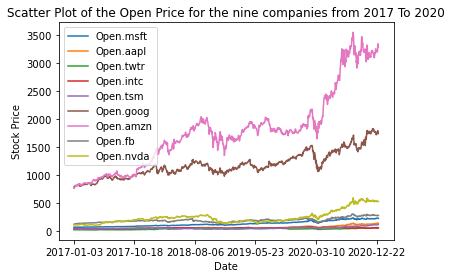

In [372]:
# Scatter Plot of the open Price for the nine companies
import pylab as pl
from pandas import *
df_all_open.plot()
pl.title("Scatter Plot of the Open Price for the nine companies from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

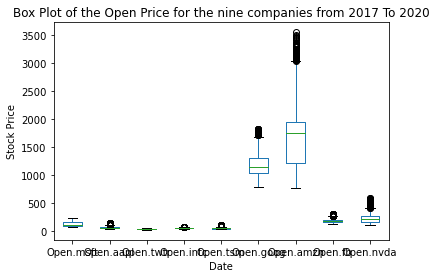

In [373]:
# Box Plot of the open Price for the nine companies
import pylab as pl
from pandas import *
df_all_open.plot.box()
pl.title("Box Plot of the Open Price for the nine companies from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

In [374]:
# Gettind data set for the Closing Price of all the nine Companies
df_all_close = df[["Date","Close.msft","Close.aapl","Close.twtr","Close.intc","Close.tsm","Close.goog","Close.amzn","Close.fb","Close.nvda"]]
df_all_close = df_all_close.set_index('Date', append=False)
df_all_close

,Close.msft,Close.aapl,Close.twtr,Close.intc,Close.tsm,Close.goog,Close.amzn,Close.fb,Close.nvda
Date,,,,,,,,,
2017-01-03,62.580002,29.037500,16.440001,36.599998,29.309999,786.140015,753.669983,116.860001,102.010002
2017-01-04,62.299999,29.004999,16.860001,36.410000,29.299999,786.900024,757.179993,118.690002,104.389999
2017-01-05,62.299999,29.152500,17.090000,36.349998,29.799999,794.020020,780.450012,120.669998,101.739998
2017-01-06,62.840000,29.477501,17.170000,36.480000,29.629999,806.150024,795.989990,123.410004,103.099998
2017-01-09,62.639999,29.747499,17.500000,36.610001,30.040001,806.650024,796.919983,124.900002,107.279999
...,...,...,...,...,...,...,...,...,...
2020-12-24,222.750000,131.970001,53.970001,47.070000,105.970001,1738.849976,3172.689941,267.399994,519.750000
2020-12-28,224.960007,136.690002,54.430000,47.070000,106.150002,1776.089966,3283.959961,277.000000,516.000000
2020-12-29,224.149994,134.869995,54.360001,49.389999,105.559998,1758.719971,3322.000000,276.779999,517.729980


Text(0, 0.5, 'Stock Price')

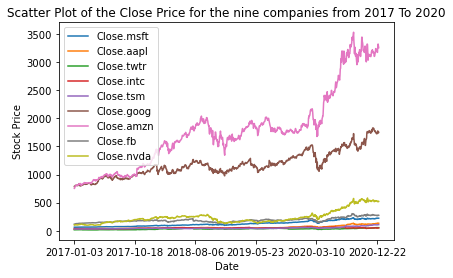

In [375]:
# Scatter Plot of the Close Price for the nine companies
import pylab as pl
from pandas import *
df_all_close.plot()
pl.title("Scatter Plot of the Close Price for the nine companies from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

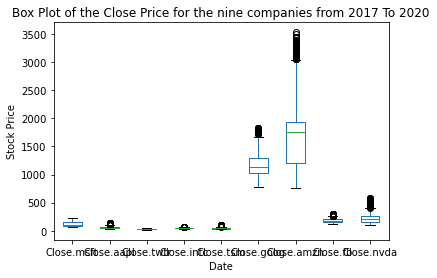

In [376]:
# Box Plot of the Close Price for the nine companies
import pylab as pl
from pandas import *
df_all_close.plot.box()
pl.title("Box Plot of the Close Price for the nine companies from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

In [377]:
# Gettind data set for the volume of all the nine Companies
df_all_Volume = df[["Date","Volume.msft","Volume.aapl","Volume.twtr","Volume.intc","Volume.tsm","Volume.goog","Volume.amzn","Volume.fb","Volume.nvda"]]
df_all_Volume = df_all_Volume.set_index('Date', append=False)
df_all_Volume

,Volume.msft,Volume.aapl,Volume.twtr,Volume.intc,Volume.tsm,Volume.goog,Volume.amzn,Volume.fb,Volume.nvda
Date,,,,,,,,,
2017-01-03,20694100.0,115127600.0,11147900.0,20196500.0,6280300.0,1657300.0,3521100.0,20663900.0,37549900.0
2017-01-04,21340000.0,84472400.0,15861300.0,15915700.0,4391800.0,1073000.0,2510500.0,19630900.0,29980500.0
2017-01-05,24876000.0,88774400.0,17074400.0,13986000.0,4775700.0,1335200.0,5830100.0,19492200.0,24607400.0
2017-01-06,19922900.0,127007600.0,14665100.0,15114000.0,4878700.0,1640200.0,5986200.0,28545300.0,20571400.0
2017-01-09,20382700.0,134247600.0,11918100.0,19461400.0,8371700.0,1274600.0,3446100.0,22880400.0,22906200.0
...,...,...,...,...,...,...,...,...,...
2020-12-24,10550600.0,54930100.0,3661100.0,11865600.0,3172100.0,346800.0,1451900.0,6702000.0,2447100.0
2020-12-28,17933500.0,124486200.0,6829600.0,21269200.0,5157000.0,1393000.0,5686800.0,23299700.0,5314100.0
2020-12-29,17403200.0,121047300.0,6644800.0,84531400.0,4602400.0,1299400.0,4872900.0,16383000.0,4259300.0


Text(0, 0.5, 'Stock Price')

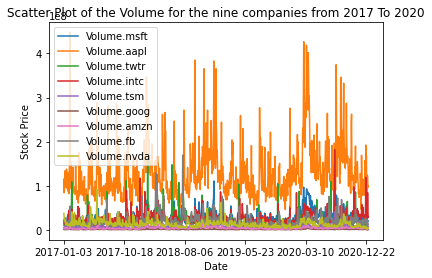

In [378]:
# Scatter Plot of the Volume for the nine companies
import pylab as pl
from pandas import *
df_all_Volume.plot()
pl.title("Scatter Plot of the Volume for the nine companies from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

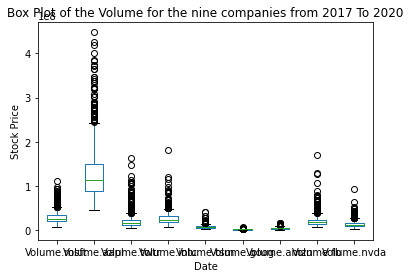

In [379]:
# Box Plot of the Volume for the nine companies
import pylab as pl
from pandas import *
df_all_Volume.plot.box()
pl.title("Box Plot of the Volume for the nine companies from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

In [241]:
# copy my df for analysis and plots
df_analysis = df.copy()
df_plots = df.copy()
df1 = df_analysis
df2 = df_plots.set_index('Date', append=False) # Setting the Date as the index of my plots data set 
 

In [242]:
# Gettind data set for Apple for Plotting
df_aapl_1 = df2[["Open.aapl","Low.aapl","High.aapl","Adj Close.aapl","Close.aapl","Volume.aapl"]]
df_aapl_2 = df_aapl_1.loc[:,df_aapl_1.columns != "Volume.aapl"] # without volume 
df_aapl_1.head()

,Open.aapl,Low.aapl,High.aapl,Adj Close.aapl,Close.aapl,Volume.aapl
Date,,,,,,
2017-01-03,28.950001,28.690001,29.082500,27.413372,29.037500,115127600.0
2017-01-04,28.962500,28.937500,29.127501,27.382690,29.004999,84472400.0
2017-01-05,28.980000,28.952499,29.215000,27.521944,29.152500,88774400.0
2017-01-06,29.195000,29.117500,29.540001,27.828764,29.477501,127007600.0
2017-01-09,29.487499,29.485001,29.857500,28.083660,29.747499,134247600.0


In [244]:
df_aapl_1.describe()

,Open.aapl,Low.aapl,High.aapl,Adj Close.aapl,Close.aapl,Volume.aapl
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,58.098940,57.478813,58.749191,56.932836,58.146095,1.286177e+08
std,25.308217,24.833201,25.717278,25.665158,25.287549,5.865099e+07
min,28.950001,28.690001,29.082500,27.382690,29.004999,4.544800e+07
25%,41.372499,40.918751,41.883749,39.891335,41.342499,8.821225e+07
50%,48.105000,47.787498,48.615002,46.791222,48.185001,1.125592e+08
75%,66.692501,65.960003,67.508751,65.970161,66.752502,1.504132e+08
max,138.050003,134.339996,138.789993,136.254608,136.690002,4.479400e+08


Text(0, 0.5, 'Stock Price')

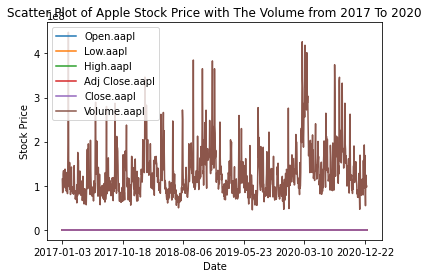

In [245]:
# Scatter Plot of Apple with the Volume of Stock
import pylab as pl
from pandas import *
df_aapl_1.plot()
pl.title("Scatter Plot of Apple Stock Price with The Volume from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

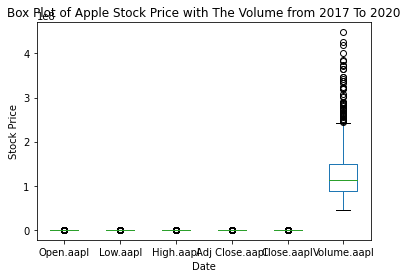

In [246]:
# Box Plot of Apple Stock with the volume of Stock
df_aapl_1.plot.box()
pl.title("Box Plot of Apple Stock Price with The Volume from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

In [247]:
df_aapl_2.head()

,Open.aapl,Low.aapl,High.aapl,Adj Close.aapl,Close.aapl
Date,,,,,
2017-01-03,28.950001,28.690001,29.082500,27.413372,29.037500
2017-01-04,28.962500,28.937500,29.127501,27.382690,29.004999
2017-01-05,28.980000,28.952499,29.215000,27.521944,29.152500
2017-01-06,29.195000,29.117500,29.540001,27.828764,29.477501
2017-01-09,29.487499,29.485001,29.857500,28.083660,29.747499


In [248]:
df_aapl_2.describe()

,Open.aapl,Low.aapl,High.aapl,Adj Close.aapl,Close.aapl
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,58.098940,57.478813,58.749191,56.932836,58.146095
std,25.308217,24.833201,25.717278,25.665158,25.287549
min,28.950001,28.690001,29.082500,27.382690,29.004999
25%,41.372499,40.918751,41.883749,39.891335,41.342499
50%,48.105000,47.787498,48.615002,46.791222,48.185001
75%,66.692501,65.960003,67.508751,65.970161,66.752502
max,138.050003,134.339996,138.789993,136.254608,136.690002


Text(0, 0.5, 'Stock Price')

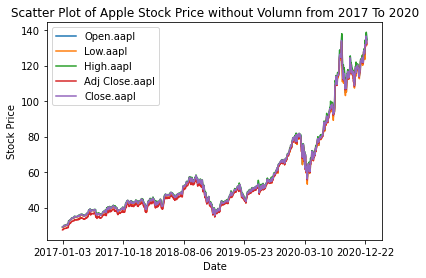

In [249]:
# Scatter Plot of Apple without the Volume of Stock
import pylab as pl
from pandas import *
df_aapl_2.plot()
pl.title("Scatter Plot of Apple Stock Price without Volumn from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

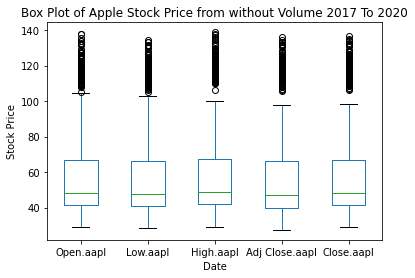

In [250]:
# Box Plot of Apple Stock without the volume of Stock
df_aapl_2.plot.box()
pl.title("Box Plot of Apple Stock Price from without Volume 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

In [289]:
# Gettind data set for Apple for Prediction
df_aapl_3 = df1[["Date","Open.aapl","Low.aapl","High.aapl","Adj Close.aapl","Close.aapl","Volume.aapl"]]
df_aapl_4 = df_aapl_3.loc[:,df_aapl_3.columns != "Volume.aapl"] # without volume 
df_aapl_4.head()

,Date,Open.aapl,Low.aapl,High.aapl,Adj Close.aapl,Close.aapl
0,2017-01-03,28.950001,28.690001,29.082500,27.413372,29.037500
1,2017-01-04,28.962500,28.937500,29.127501,27.382690,29.004999
2,2017-01-05,28.980000,28.952499,29.215000,27.521944,29.152500
3,2017-01-06,29.195000,29.117500,29.540001,27.828764,29.477501
4,2017-01-09,29.487499,29.485001,29.857500,28.083660,29.747499


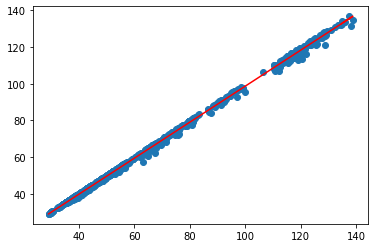

array([[0.98284267]])

In [298]:
# Building Models for Apple Stock
# Model_1: Predict Apple Close Price using High Price 
 

X_ap1 = df_aapl_4.iloc[:, 3].values.reshape(-1, 1)  # iloc[:, 3] is the High Price column 
Y_ap1 = df_aapl_4.iloc[:, 5].values.reshape(-1, 1)  # df.iloc[:, 4] is the Close Price column 
linear_regressor = LinearRegression()
linear_regressor.fit(X_ap1, Y_ap1)
Y_appl_1_pred = linear_regressor.predict(X_ap1)
linear_regressor.intercept_
linear_regressor.coef_
#regressor = LinearRegression()
#regressor.fit(X_ap1, Y_ap1)

plt.scatter(X_ap1, Y_ap1)
plt.plot(X_ap1, Y_appl_1_pred, color='red')
plt.show()
linear_regressor.intercept_
linear_regressor.coef_

In [299]:
Y_appl_1_pred = pd.DataFrame(Y_appl_1_pred, columns = ["Prediction"])
Y_appl_1_pred

,Prediction
0,28.988406
1,29.032634
2,29.118632
3,29.438057
4,29.750108
...,...
1002,131.575073
1003,135.388492
1004,136.813611
1005,134.061664


In [300]:
df_aapl_4_date = pd.DataFrame(df_aapl_4.Date, columns = ["Date"])
df_aapl_4_date

,Date
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09
...,...
1002,2020-12-24
1003,2020-12-28
1004,2020-12-29
1005,2020-12-30


In [301]:
appl_submit_1 = pd.DataFrame({"Date": df_aapl_4.Date, "Close_Price":df_aapl_4["Close.aapl"], "Close_Prediction":Y_appl_1_pred.Prediction})
appl_submit_1

,Date,Close_Price,Close_Prediction
0,2017-01-03,29.037500,28.988406
1,2017-01-04,29.004999,29.032634
2,2017-01-05,29.152500,29.118632
3,2017-01-06,29.477501,29.438057
4,2017-01-09,29.747499,29.750108
...,...,...,...
1002,2020-12-24,131.970001,131.575073
1003,2020-12-28,136.690002,135.388492
1004,2020-12-29,134.869995,136.813611
1005,2020-12-30,133.720001,134.061664


In [303]:
df_aapl_3.head()

,Date,Open.aapl,Low.aapl,High.aapl,Adj Close.aapl,Close.aapl,Volume.aapl
0,2017-01-03,28.950001,28.690001,29.082500,27.413372,29.037500,115127600.0
1,2017-01-04,28.962500,28.937500,29.127501,27.382690,29.004999,84472400.0
2,2017-01-05,28.980000,28.952499,29.215000,27.521944,29.152500,88774400.0
3,2017-01-06,29.195000,29.117500,29.540001,27.828764,29.477501,127007600.0
4,2017-01-09,29.487499,29.485001,29.857500,28.083660,29.747499,134247600.0


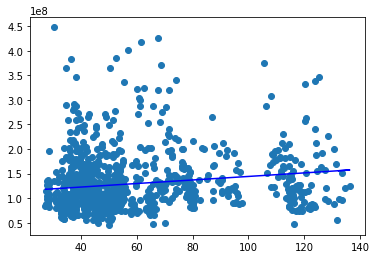

array([[360753.69292814]])

In [304]:
# Model_2: Predict Apple Volume using Close Price
X_ap2 = df_aapl_3.iloc[:, 4].values.reshape(-1, 1)  # iloc[:, 4] is the Close Price column 
Y_ap2 = df_aapl_3.iloc[:, 6].values.reshape(-1, 1)  # df.iloc[:, 6] is the Volumn column 
linear_regressor = LinearRegression()
linear_regressor.fit(X_ap2, Y_ap2)
Y_appl_2_pred = linear_regressor.predict(X_ap2)
linear_regressor.intercept_
linear_regressor.coef_
#regressor = LinearRegression()
#regressor.fit(X_ap2, Y_ap2)

plt.scatter(X_ap2, Y_ap2)
plt.plot(X_ap2, Y_appl_2_pred, color='blue')
plt.show()
linear_regressor.intercept_
linear_regressor.coef_


In [306]:
Y_appl_2_pred = pd.DataFrame(Y_appl_2_pred, columns = ["Prediction"])
Y_appl_2_pred

,Prediction
0,1.179685e+08
1,1.179574e+08
2,1.180076e+08
3,1.181183e+08
4,1.182103e+08
...,...
1002,1.555360e+08
1003,1.572333e+08
1004,1.565789e+08
1005,1.561653e+08


In [307]:
df_aapl_3_date = pd.DataFrame(df_aapl_3.Date, columns = ["Date"])
df_aapl_3_date

,Date
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09
...,...
1002,2020-12-24
1003,2020-12-28
1004,2020-12-29
1005,2020-12-30


In [308]:
appl_submit_2 = pd.DataFrame({"Date": df_aapl_3.Date, "Volume":df_aapl_3["Volume.aapl"], "Volume_Prediction":Y_appl_2_pred.Prediction})
appl_submit_2

,Date,Volume,Volume_Prediction
0,2017-01-03,115127600.0,1.179685e+08
1,2017-01-04,84472400.0,1.179574e+08
2,2017-01-05,88774400.0,1.180076e+08
3,2017-01-06,127007600.0,1.181183e+08
4,2017-01-09,134247600.0,1.182103e+08
...,...,...,...
1002,2020-12-24,54930100.0,1.555360e+08
1003,2020-12-28,124486200.0,1.572333e+08
1004,2020-12-29,121047300.0,1.565789e+08
1005,2020-12-30,96452100.0,1.561653e+08


In [309]:
df2.dtypes

Adj Close.msft    float64
Adj Close.aapl    float64
Adj Close.twtr    float64
Adj Close.intc    float64
Adj Close.tsm     float64
Adj Close.goog    float64
Adj Close.amzn    float64
Adj Close.fb      float64
Adj Close.nvda    float64
Close.msft        float64
Close.aapl        float64
Close.twtr        float64
Close.intc        float64
Close.tsm         float64
Close.goog        float64
Close.amzn        float64
Close.fb          float64
Close.nvda        float64
High.msft         float64
High.aapl         float64
High.twtr         float64
High.intc         float64
High.tsm          float64
High.goog         float64
High.amzn         float64
High.fb           float64
High.nvda         float64
Low.msft          float64
Low.aapl          float64
Low.twtr          float64
Low.intc          float64
Low.tsm           float64
Low.goog          float64
Low.amzn          float64
Low.fb            float64
Low.nvda          float64
Open.msft         float64
Open.aapl         float64
Open.twtr   

In [310]:
# Gettind data set for Google for Plotting
df_goog_1 = df2[["Open.goog","Low.goog","High.goog","Adj Close.goog","Close.goog","Volume.goog"]]
df_goog_2 = df_goog_1.loc[:,df_goog_1.columns != "Volume.goog"] # without volume 
df_goog_1.head()

,Open.goog,Low.goog,High.goog,Adj Close.goog,Close.goog,Volume.goog
Date,,,,,,
2017-01-03,778.809998,775.799988,789.630005,786.140015,786.140015,1657300.0
2017-01-04,788.359985,783.159973,791.340027,786.900024,786.900024,1073000.0
2017-01-05,786.080017,785.020020,794.479980,794.020020,794.020020,1335200.0
2017-01-06,795.260010,792.203979,807.900024,806.150024,806.150024,1640200.0
2017-01-09,806.400024,802.830017,809.966003,806.650024,806.650024,1274600.0


In [311]:
df_goog_1.describe()

,Open.goog,Low.goog,High.goog,Adj Close.goog,Close.goog,Volume.goog
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,1175.928827,1164.837155,1187.790154,1176.818981,1176.818981,1.631309e+06
std,229.091454,226.235584,232.812087,229.424779,229.424779,7.149564e+05
min,778.809998,775.799988,789.630005,786.140015,786.140015,3.468000e+05
25%,1028.044983,1016.925018,1042.420044,1028.989990,1028.989990,1.199100e+06
50%,1138.000000,1127.364014,1147.939941,1139.319946,1139.319946,1.446500e+06
75%,1293.479980,1281.750000,1305.065002,1295.309998,1295.309998,1.836350e+06
max,1824.520020,1822.650024,1847.199951,1827.989990,1827.989990,6.207000e+06


Text(0, 0.5, 'Stock Price')

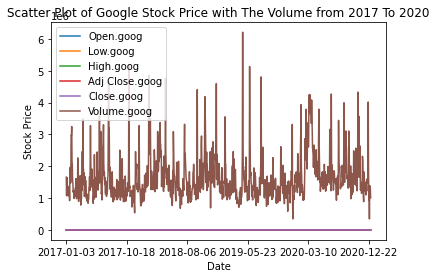

In [312]:
# Scatter Plot of Google with the Volume of Stock
import pylab as pl
from pandas import *
df_goog_1.plot()
pl.title("Scatter Plot of Google Stock Price with The Volume from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

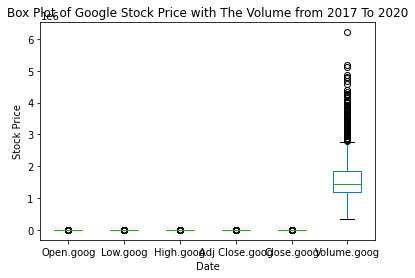

In [313]:
# Box Plot of Google Stock with the volume of Stock
df_goog_1.plot.box()
pl.title("Box Plot of Google Stock Price with The Volume from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

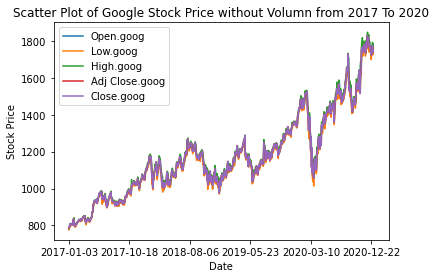

In [314]:
# Scatter Plot of Google without the Volume of Stock
import pylab as pl
from pandas import *
df_goog_2.plot()
pl.title("Scatter Plot of Google Stock Price without Volumn from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

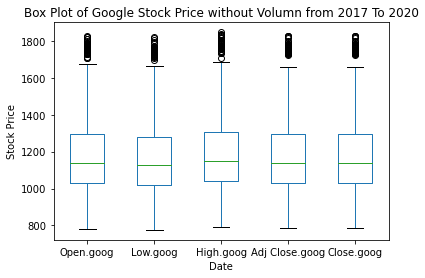

In [315]:
# Box Plot of Google without the Volume of Stock
import pylab as pl
from pandas import *
df_goog_2.plot.box()
pl.title("Box Plot of Google Stock Price without Volumn from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

In [324]:
# Gettind data set for Google for Prediction
df_goog_3 = df1[[ "Date","Open.goog","Low.goog","High.goog","Adj Close.goog","Close.goog","Volume.goog"]]
df_goog_4 = df_goog_3.loc[:,df_goog_3.columns != "Volume.goog"] # without volume 
df_goog_4.head()

,Date,Open.goog,Low.goog,High.goog,Adj Close.goog,Close.goog
0,2017-01-03,778.809998,775.799988,789.630005,786.140015,786.140015
1,2017-01-04,788.359985,783.159973,791.340027,786.900024,786.900024
2,2017-01-05,786.080017,785.020020,794.479980,794.020020,794.020020
3,2017-01-06,795.260010,792.203979,807.900024,806.150024,806.150024
4,2017-01-09,806.400024,802.830017,809.966003,806.650024,806.650024


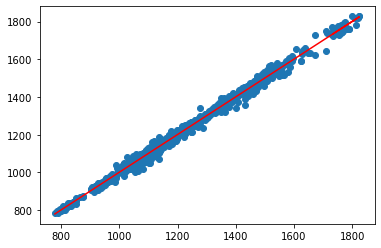

array([[0.998947]])

In [336]:
# Building Models for Google Stock
# Model_3: Predict Google Close Price using Open Price 
 

X_gog1 = df_goog_4.iloc[:, 1].values.reshape(-1, 1)  # iloc[:, 0] is the Open Price column 
Y_gog1 = df_goog_4.iloc[:, 5].values.reshape(-1, 1)  # df.iloc[:, 5] is the Close Price column 
linear_regressor = LinearRegression()
linear_regressor.fit(X_gog1, Y_gog1)
Y_gog1_1_pred = linear_regressor.predict(X_gog1)
linear_regressor.intercept_
linear_regressor.coef_
#regressor = LinearRegression()
#regressor.fit(X_gog1, Y_gog1)

plt.scatter(X_gog1, Y_gog1)
plt.plot(X_gog1, Y_gog1_1_pred, color='red')
plt.show()
linear_regressor.intercept_
linear_regressor.coef_

In [337]:
Y_gog1_1_pred = pd.DataFrame(Y_gog1_1_pred, columns = ["Prediction"])
Y_gog1_1_pred

,Prediction
0,780.118317
1,789.658249
2,787.380681
3,796.551007
4,807.679292
...,...
1002,1735.301452
1003,1751.918945
1004,1788.035903
1005,1762.283020


In [338]:
df_goog_4_date = pd.DataFrame(df_goog_4.Date, columns = ["Date"])
df_goog_4_date

,Date
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09
...,...
1002,2020-12-24
1003,2020-12-28
1004,2020-12-29
1005,2020-12-30


In [339]:
goog_submit_1 = pd.DataFrame({"Date": df_goog_4.Date, "Close.goog":df_goog_4["Close.goog"], "Close_goog_Prediction":Y_gog1_1_pred.Prediction})
goog_submit_1

,Date,Close.goog,Close_goog_Prediction
0,2017-01-03,786.140015,780.118317
1,2017-01-04,786.900024,789.658249
2,2017-01-05,794.020020,787.380681
3,2017-01-06,806.150024,796.551007
4,2017-01-09,806.650024,807.679292
...,...,...,...
1002,2020-12-24,1738.849976,1735.301452
1003,2020-12-28,1776.089966,1751.918945
1004,2020-12-29,1758.719971,1788.035903
1005,2020-12-30,1739.520020,1762.283020


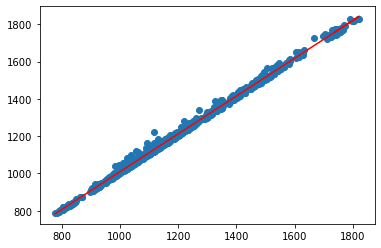

array([[1.01294714]])

In [341]:
# Building Models for Google Stock
# Model_2: Predict Google Adjusted Price using Low Price 
 

X_gog2 = df_goog_4.iloc[:, 2].values.reshape(-1, 1)  # iloc[:, 0] is the Open Price column 
Y_gog2 = df_goog_4.iloc[:, 4].values.reshape(-1, 1)  # df.iloc[:, 4] is the Close Price column 
linear_regressor = LinearRegression()
linear_regressor.fit(X_gog2, Y_gog2)
Y_gog2_2_pred = linear_regressor.predict(X_gog2)
linear_regressor.intercept_
linear_regressor.coef_
#regressor = LinearRegression()
#regressor.fit(X_gog2, Y_gog2)

plt.scatter(X_gog2, Y_gog2)
plt.plot(X_gog2, Y_gog2_2_pred, color='red')
plt.show()
linear_regressor.intercept_
linear_regressor.coef_

In [344]:
Y_gog2_2_pred = pd.DataFrame(Y_gog2_2_pred, columns = ["Prediction"])
Y_gog2_2_pred

,Prediction
0,782.744897
1,790.200173
2,792.084302
3,799.361273
4,810.124888
...,...
1002,1748.397528
1003,1765.845518
1004,1775.726822
1005,1744.842074


In [345]:
df_goog_4_date = pd.DataFrame(df_goog_4.Date, columns = ["Date"])
df_goog_4_date

,Date
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09
...,...
1002,2020-12-24
1003,2020-12-28
1004,2020-12-29
1005,2020-12-30


In [346]:
goog_submit_2 = pd.DataFrame({"Date": df_goog_4.Date, "Adj Close.goog":df_goog_4["Adj Close.goog"], "Adj Close.goog_Prediction":Y_gog2_2_pred.Prediction})
goog_submit_2

,Date,Adj Close.goog,Adj Close.goog_Prediction
0,2017-01-03,786.140015,782.744897
1,2017-01-04,786.900024,790.200173
2,2017-01-05,794.020020,792.084302
3,2017-01-06,806.150024,799.361273
4,2017-01-09,806.650024,810.124888
...,...,...,...
1002,2020-12-24,1738.849976,1748.397528
1003,2020-12-28,1776.089966,1765.845518
1004,2020-12-29,1758.719971,1775.726822
1005,2020-12-30,1739.520020,1744.842074


In [348]:
# Gettind data set for Amazon for Plotting
df_amzn_1 = df2[["Open.amzn","Low.amzn","High.amzn","Adj Close.amzn","Close.amzn","Volume.amzn"]]
df_amzn_2 = df_amzn_1.loc[:,df_amzn_1.columns != "Volume.amzn"] # without volume 
df_amzn_1.head()

,Open.amzn,Low.amzn,High.amzn,Adj Close.amzn,Close.amzn,Volume.amzn
Date,,,,,,
2017-01-03,757.919983,747.700012,758.760010,753.669983,753.669983,3521100.0
2017-01-04,758.390015,754.200012,759.679993,757.179993,757.179993,2510500.0
2017-01-05,761.549988,760.260010,782.400024,780.450012,780.450012,5830100.0
2017-01-06,782.359985,778.479980,799.440002,795.989990,795.989990,5986200.0
2017-01-09,798.000000,791.770020,801.770020,796.919983,796.919983,3446100.0


In [349]:
df_amzn_1.describe()

,Open.amzn,Low.amzn,High.amzn,Adj Close.amzn,Close.amzn,Volume.amzn
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,1772.351073,1750.786525,1791.078330,1771.812522,1771.812522,4.491354e+06
std,681.613696,669.486609,691.501813,680.387522,680.387522,2.166078e+06
min,757.919983,747.700012,758.760010,753.669983,753.669983,8.813000e+05
25%,1203.770020,1189.835022,1209.450012,1200.014954,1200.014954,2.982000e+06
50%,1749.140015,1730.359985,1763.500000,1749.619995,1749.619995,3.907200e+06
75%,1935.135010,1910.525024,1956.169983,1939.005005,1939.005005,5.394300e+06
max,3547.000000,3486.689941,3552.250000,3531.449951,3531.449951,1.656500e+07


Text(0, 0.5, 'Stock Price')

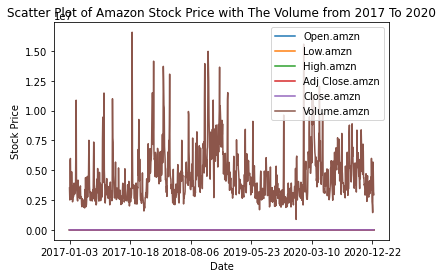

In [350]:
# Scatter Plot of Amazon with the Volume of Stock
import pylab as pl
from pandas import *
df_amzn_1.plot()
pl.title("Scatter Plot of Amazon Stock Price with The Volume from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

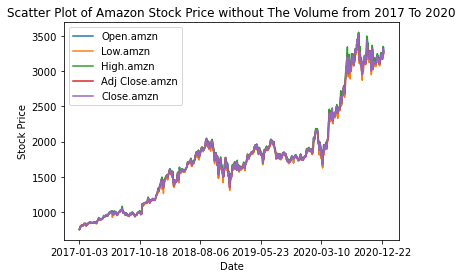

In [351]:
# Scatter Plot of Amazon without the Volume of Stock
import pylab as pl
from pandas import *
df_amzn_2.plot()
pl.title("Scatter Plot of Amazon Stock Price without The Volume from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

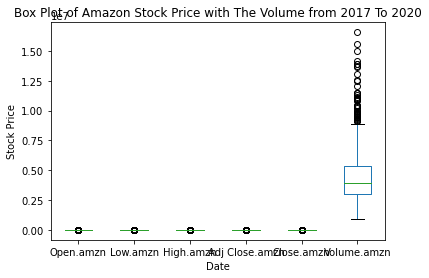

In [352]:
# Box Plot of Amazon with the Volume of Stock
import pylab as pl
from pandas import *
df_amzn_1.plot.box()
pl.title("Box Plot of Amazon Stock Price with The Volume from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

Text(0, 0.5, 'Stock Price')

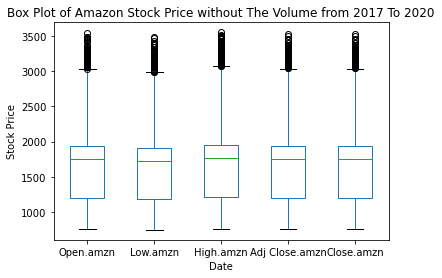

In [353]:
# Box Plot of Amazon without the Volume of Stock
import pylab as pl
from pandas import *
df_amzn_2.plot.box()
pl.title("Box Plot of Amazon Stock Price without The Volume from 2017 To 2020")
pl.xlabel("Date")
pl.ylabel("Stock Price")

In [354]:
# Gettind data set for Amazon for Prediction
df_amzn_3 = df1[[ "Date","Open.amzn","Low.amzn","High.amzn","Adj Close.amzn","Close.amzn","Volume.amzn"]]
df_amzn_4 = df_amzn_3.loc[:,df_amzn_3.columns != "Volume.amzn"] # without volume 
df_amzn_4.head()

,Date,Open.amzn,Low.amzn,High.amzn,Adj Close.amzn,Close.amzn
0,2017-01-03,757.919983,747.700012,758.760010,753.669983,753.669983
1,2017-01-04,758.390015,754.200012,759.679993,757.179993,757.179993
2,2017-01-05,761.549988,760.260010,782.400024,780.450012,780.450012
3,2017-01-06,782.359985,778.479980,799.440002,795.989990,795.989990
4,2017-01-09,798.000000,791.770020,801.770020,796.919983,796.919983


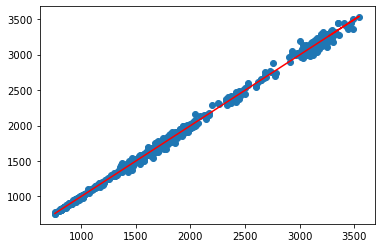

array([[0.99713015]])

In [355]:
# Building Models for Amazon Stock
# Model_5: Predict Amazon Close Price using Open Price 
 

X_amzn1 = df_amzn_4.iloc[:, 1].values.reshape(-1, 1)  # iloc[:, 0] is the Open Price column 
Y_amzn1 = df_amzn_4.iloc[:, 5].values.reshape(-1, 1)  # df.iloc[:, 5] is the Close Price column 
linear_regressor = LinearRegression()
linear_regressor.fit(X_amzn1, Y_amzn1)
Y_amzn1_1_pred = linear_regressor.predict(X_amzn1)
linear_regressor.intercept_
linear_regressor.coef_
#regressor = LinearRegression()
#regressor.fit(X_amzn1, Y_amzn1)

plt.scatter(X_amzn1, Y_amzn1)
plt.plot(X_amzn1, Y_amzn1_1_pred, color='red')
plt.show()
linear_regressor.intercept_
linear_regressor.coef_

In [357]:
Y_amzn1_1_pred = pd.DataFrame(Y_amzn1_1_pred, columns = ["Prediction"])
Y_amzn1_1_pred


,Prediction
0,760.292701
1,760.761384
2,763.912288
3,784.662564
4,800.257694
...,...
1002,3189.281713
1003,3189.381523
1004,3304.988734
1005,3335.959655


In [358]:
df_amzn_4_date = pd.DataFrame(df_amzn_4.Date, columns = ["Date"])
df_amzn_4_date

,Date
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09
...,...
1002,2020-12-24
1003,2020-12-28
1004,2020-12-29
1005,2020-12-30


In [365]:
amzn_1 = pd.DataFrame({"Date": df_amzn_4.Date, "Close.amzn":df_amzn_4["Close.amzn"], "Close.amzn_Prediction":Y_amzn1_1_pred.Prediction})
amzn_1

,Date,Close.amzn,Close.amzn_Prediction
0,2017-01-03,753.669983,760.292701
1,2017-01-04,757.179993,760.761384
2,2017-01-05,780.450012,763.912288
3,2017-01-06,795.989990,784.662564
4,2017-01-09,796.919983,800.257694
...,...,...,...
1002,2020-12-24,3172.689941,3189.281713
1003,2020-12-28,3283.959961,3189.381523
1004,2020-12-29,3322.000000,3304.988734
1005,2020-12-30,3285.850098,3335.959655


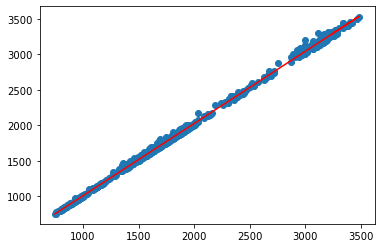

array([[1.01577771]])

In [361]:
# Building Models for Amazon Stock
# Model_6: Predict Amazon Close Price using Low Price 
 

X_amzn2 = df_amzn_4.iloc[:, 2].values.reshape(-1, 1)  # iloc[:, 0] is the Open Price column 
Y_amzn2 = df_amzn_4.iloc[:, 5].values.reshape(-1, 1)  # df.iloc[:, 5] is the Close Price column 
linear_regressor = LinearRegression()
linear_regressor.fit(X_amzn2, Y_amzn2)
Y_amzn2_2_pred = linear_regressor.predict(X_amzn2)
linear_regressor.intercept_
linear_regressor.coef_
#regressor = LinearRegression()
#regressor.fit(X_amzn2, Y_amzn2)

plt.scatter(X_amzn2, Y_amzn2)
plt.plot(X_amzn2, Y_amzn2_2_pred, color='red')
plt.show()
linear_regressor.intercept_
linear_regressor.coef_

In [363]:
Y_amzn2_2_pred = pd.DataFrame(Y_amzn2_2_pred, columns = ["Prediction"])
Y_amzn2_2_pred

,Prediction
0,752.899599
1,759.502154
2,765.657764
3,784.165205
4,797.664930
...,...
1002,3212.402161
1003,3216.150321
1004,3326.392706
1005,3327.662428


In [364]:
df_amzn_4_date = pd.DataFrame(df_amzn_4.Date, columns = ["Date"])
df_amzn_4_date

,Date
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09
...,...
1002,2020-12-24
1003,2020-12-28
1004,2020-12-29
1005,2020-12-30


In [366]:
amzn_2 = pd.DataFrame({"Date": df_amzn_4.Date, "Close.amzn":df_amzn_4["Close.amzn"], "Close.amzn_Prediction":Y_amzn2_2_pred.Prediction})
amzn_2

,Date,Close.amzn,Close.amzn_Prediction
0,2017-01-03,753.669983,752.899599
1,2017-01-04,757.179993,759.502154
2,2017-01-05,780.450012,765.657764
3,2017-01-06,795.989990,784.165205
4,2017-01-09,796.919983,797.664930
...,...,...,...
1002,2020-12-24,3172.689941,3212.402161
1003,2020-12-28,3283.959961,3216.150321
1004,2020-12-29,3322.000000,3326.392706
1005,2020-12-30,3285.850098,3327.662428


In [381]:
# Results:
#1. Amazon has the highest open and close price followed by Google
#2. While Apple has the largest volume of stock 
#3. Thus, the reason to make prediction of the close price of these three companies.
#4. So based on my Analysis, I would advise my client to buy stock in any of these three companies